In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print ("Scikit-Learn version: ", sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)
Scikit-Learn version:  1.3.0


In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data, axis=False):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")

    if not axis:
        plt.axis("off")

In [16]:
def plot_multi(img,start=0,end=100):
    plt.figure(figsize=(9, 9))
    for idx, image_data in enumerate(img[start:end]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

## data preparation

In [17]:
from pathlib import Path

path = Path() / "npz" / "asdf"
print(path)

npz\asdf


In [18]:
# get the latest datasets - rebased
curr_data_num_trVal = np.load(path / "digit_data_TrVal_rebased.npz")
curr_data_sym_trVal = np.load(path / "op_data_TrVal_rebased.npz")

In [19]:
curr_data_num_trVal_img = curr_data_num_trVal["img"]
curr_data_sym_trVal_img = curr_data_sym_trVal["img"]

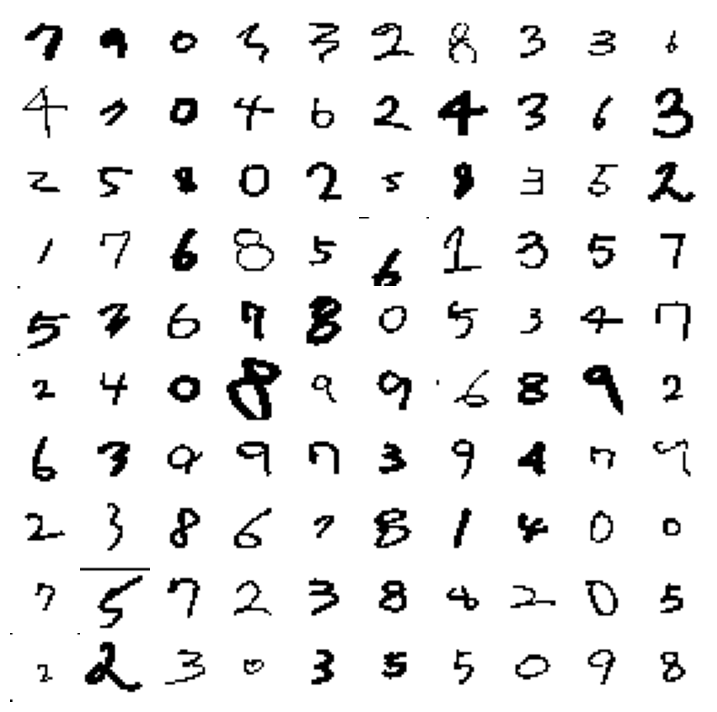

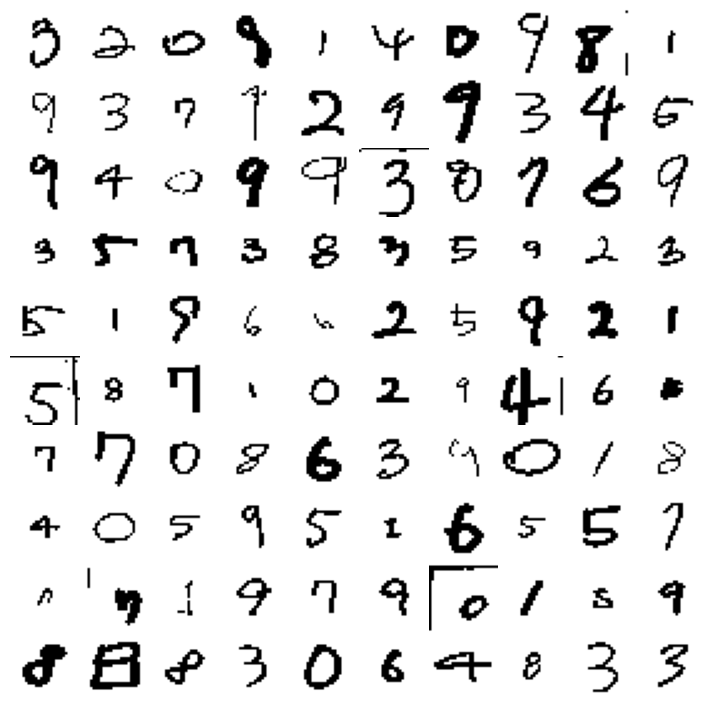

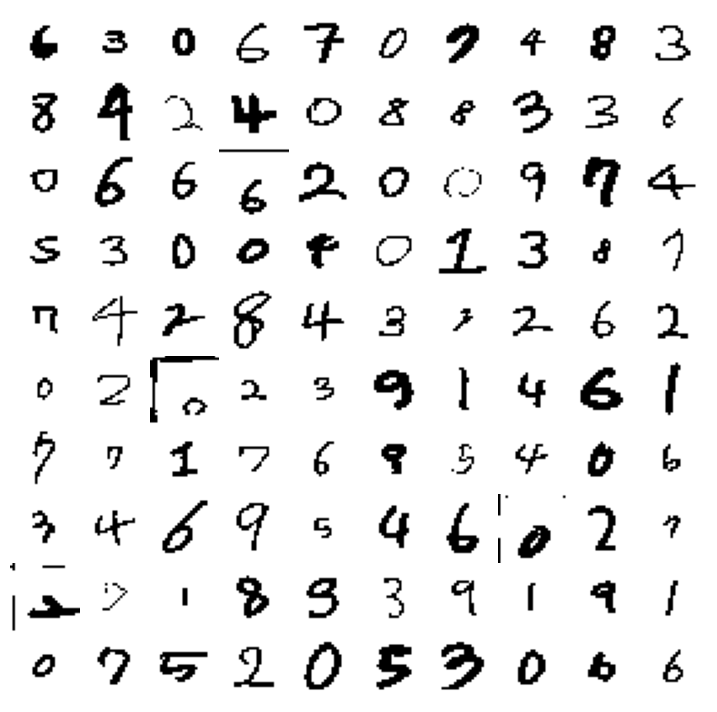

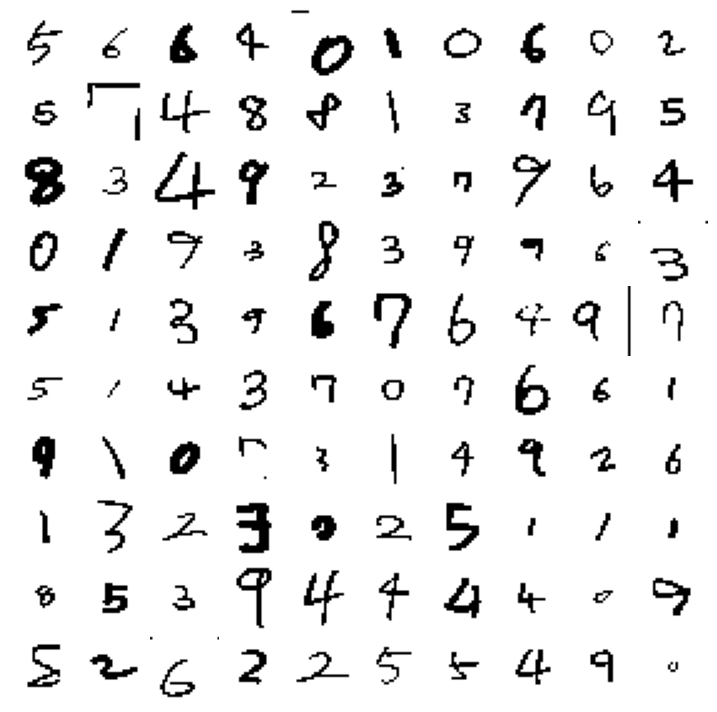

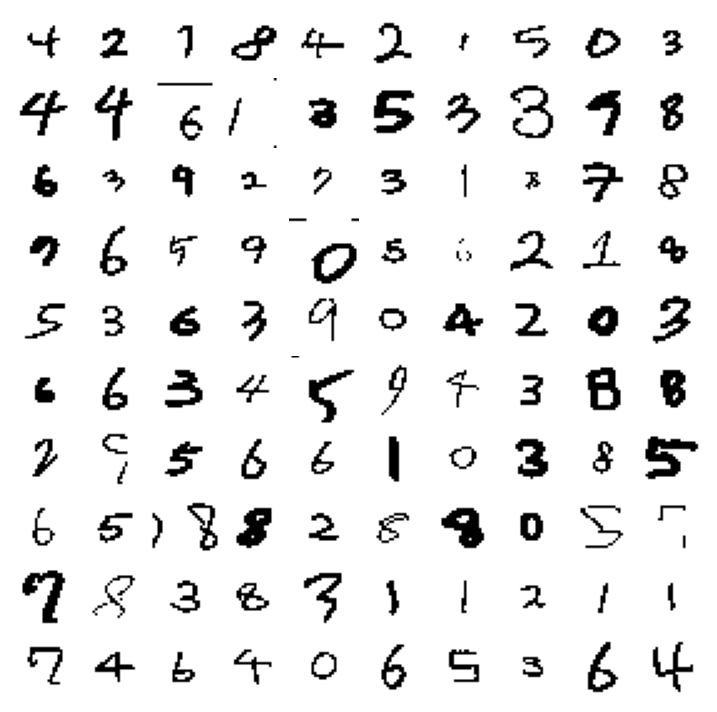

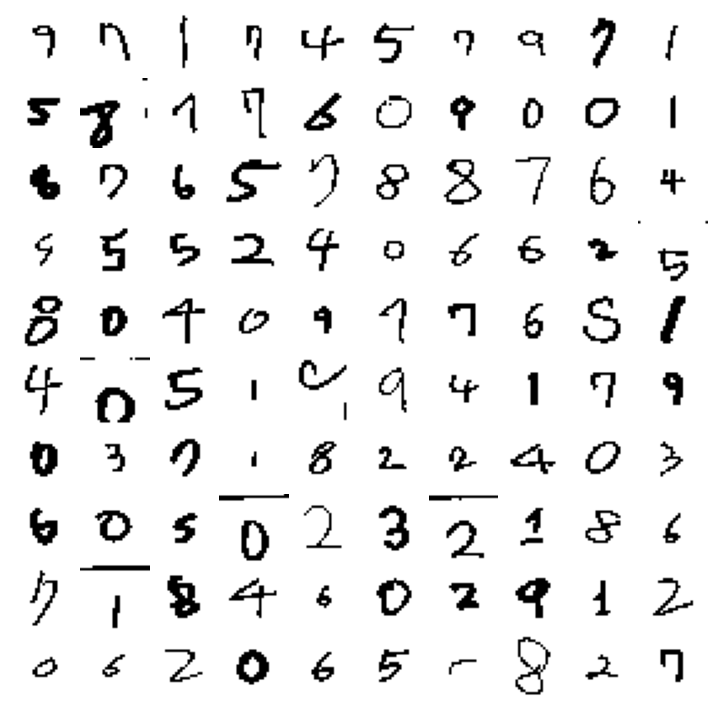

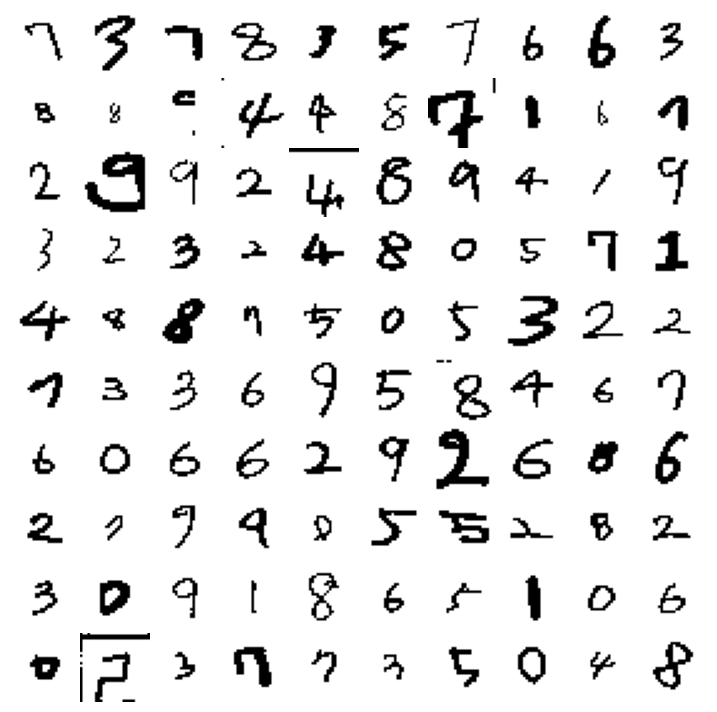

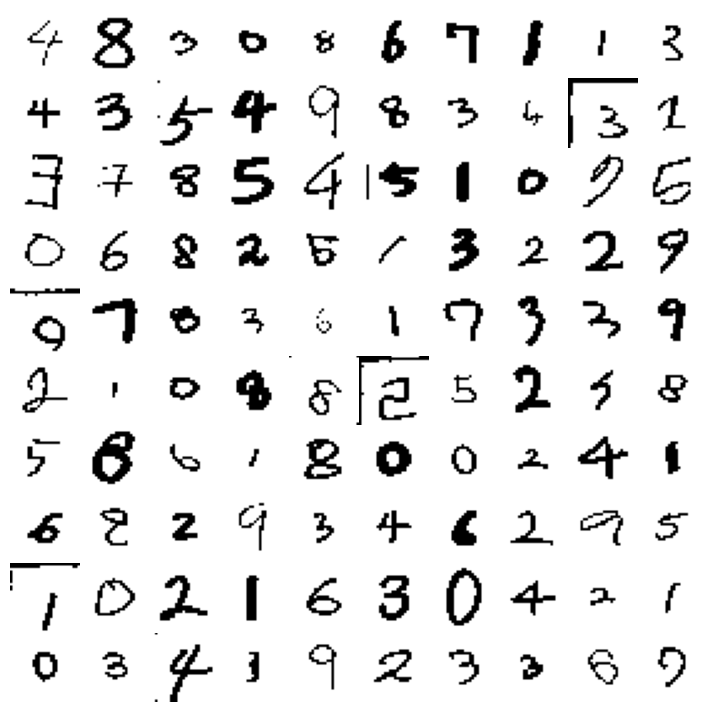

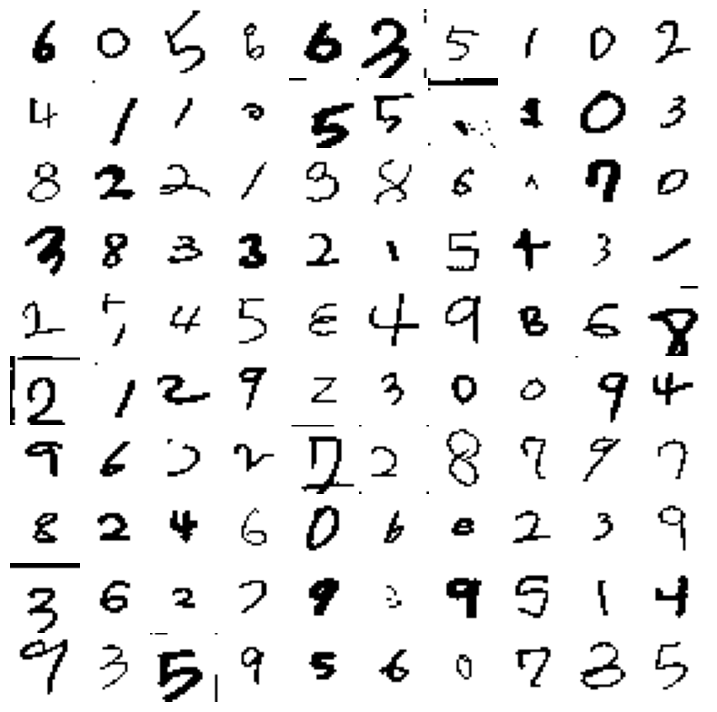

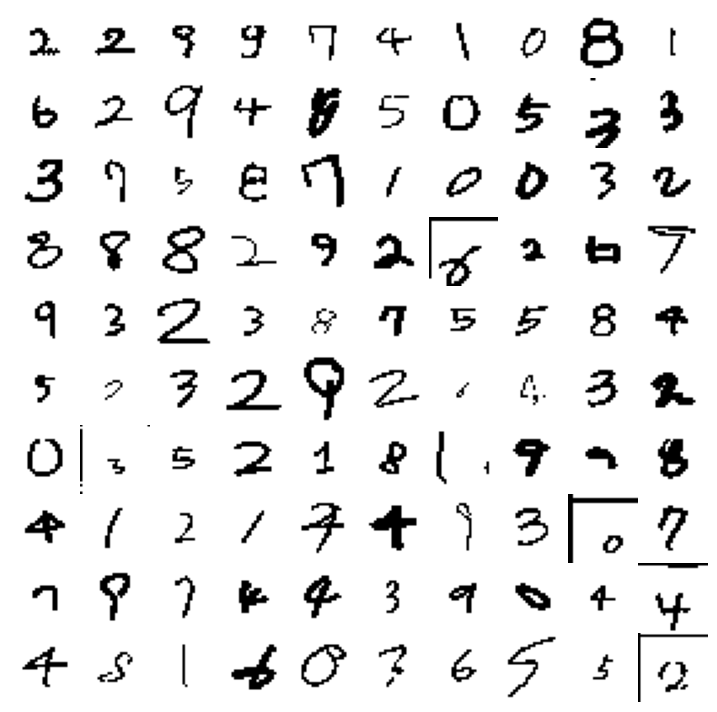

In [28]:
for i in range(10):
    plot_multi(curr_data_num_trVal_img,i * 100,i * 100 + 100)

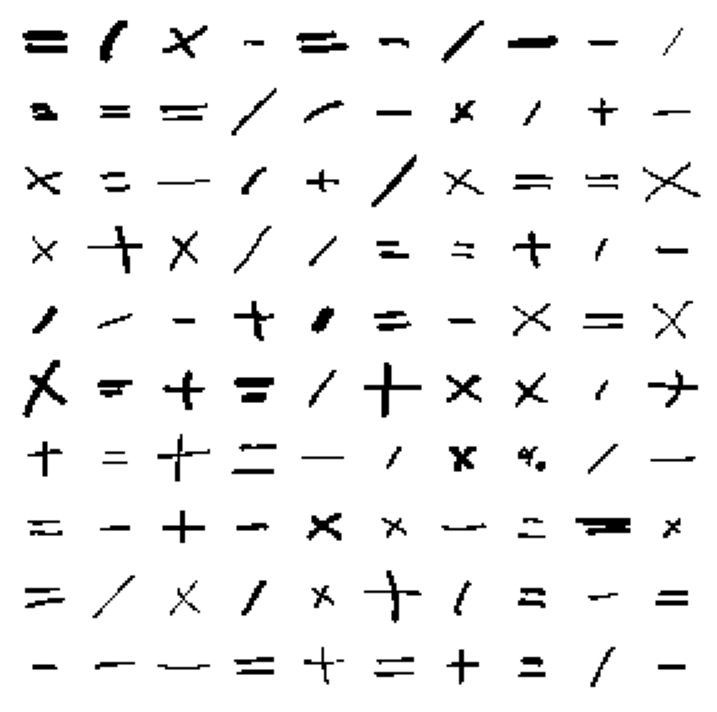

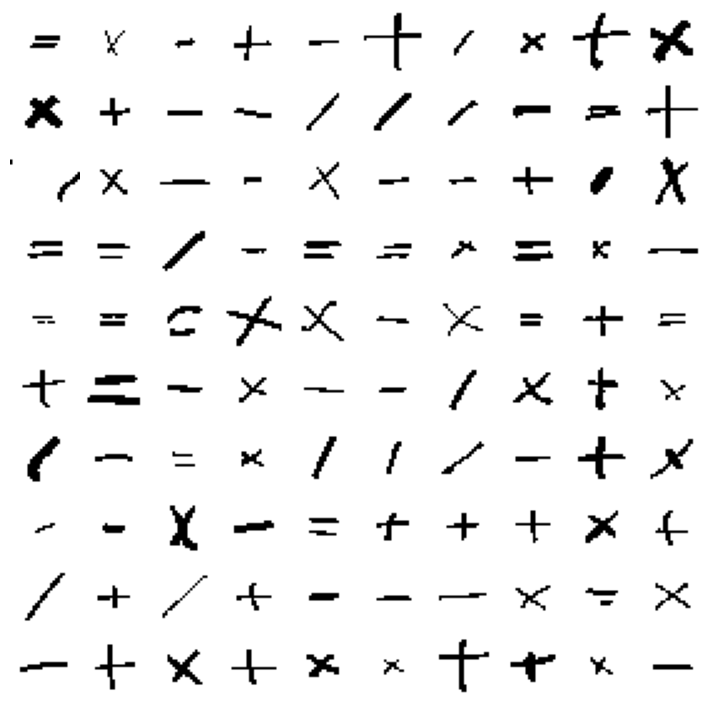

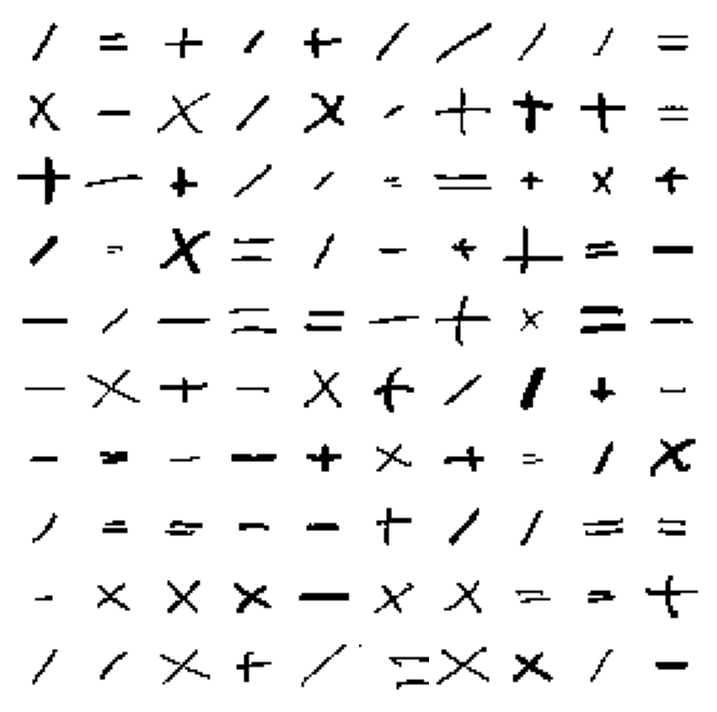

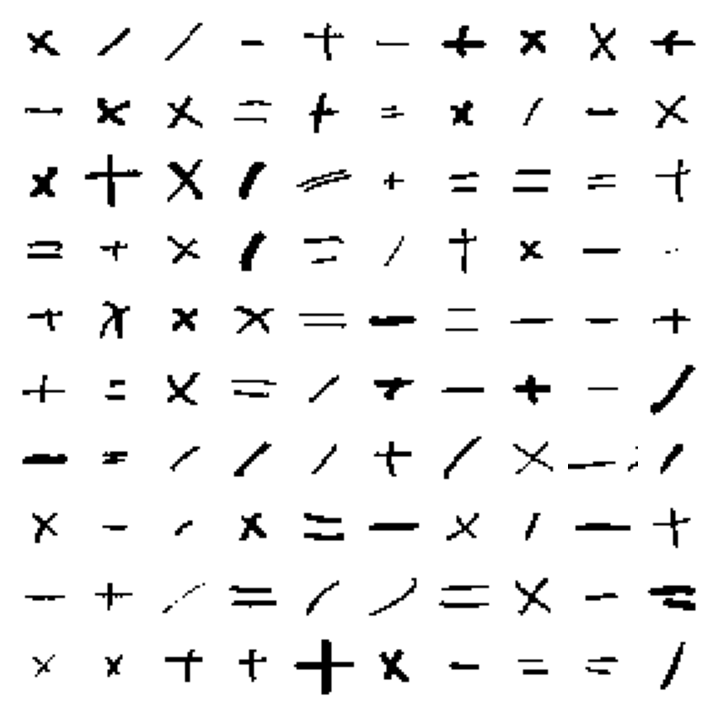

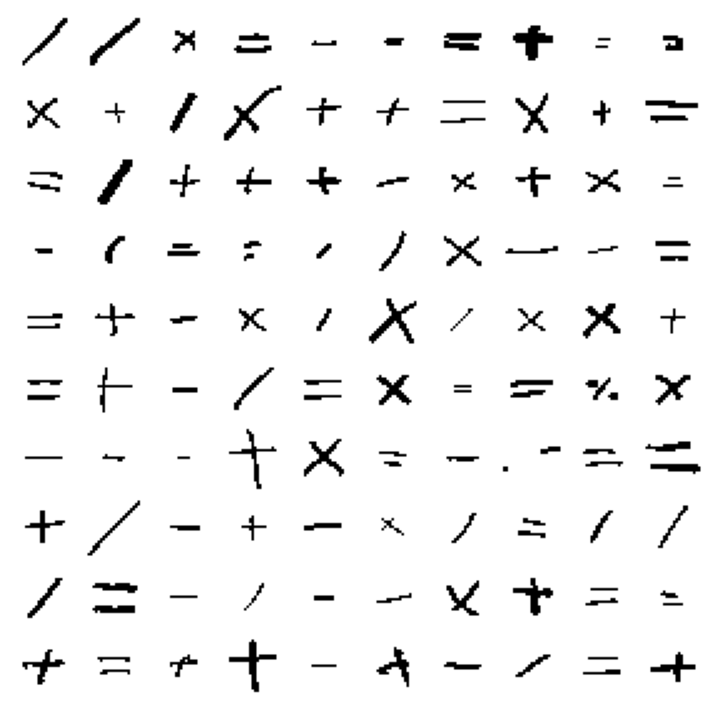

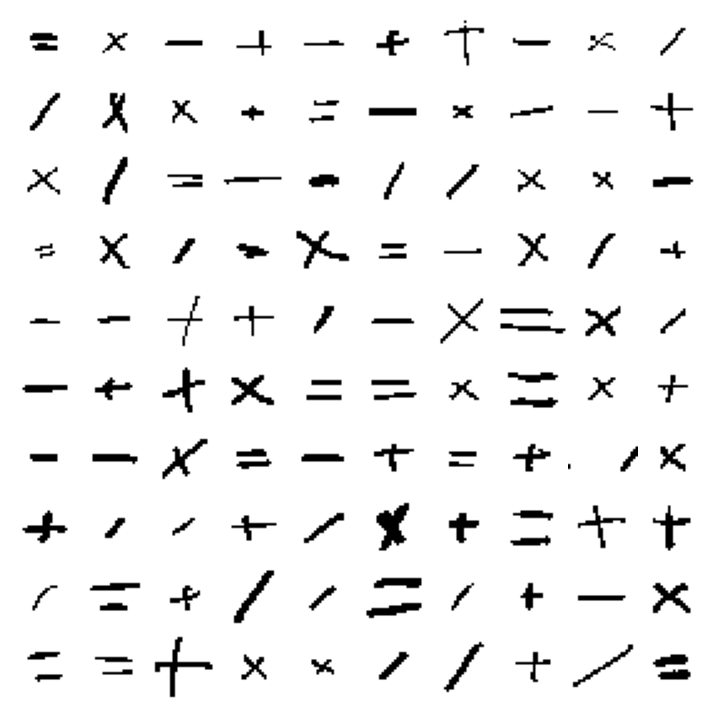

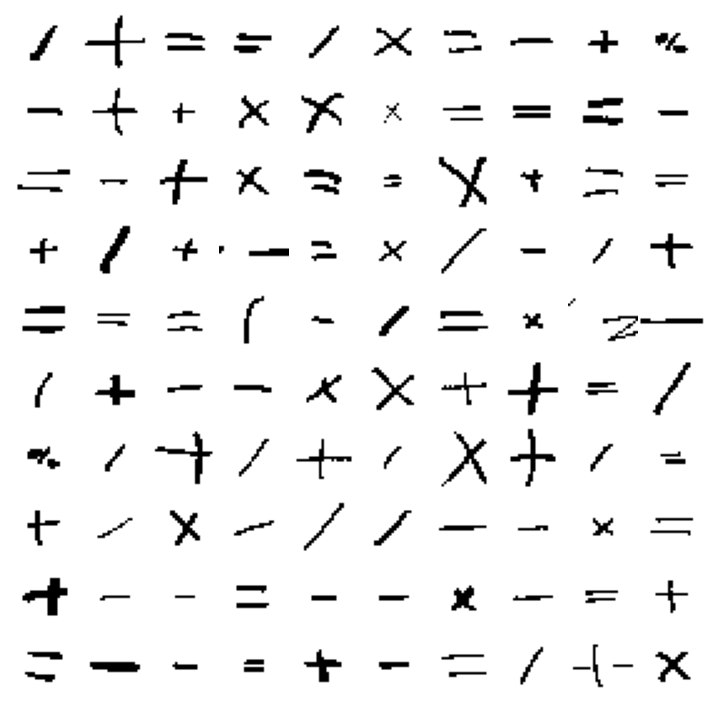

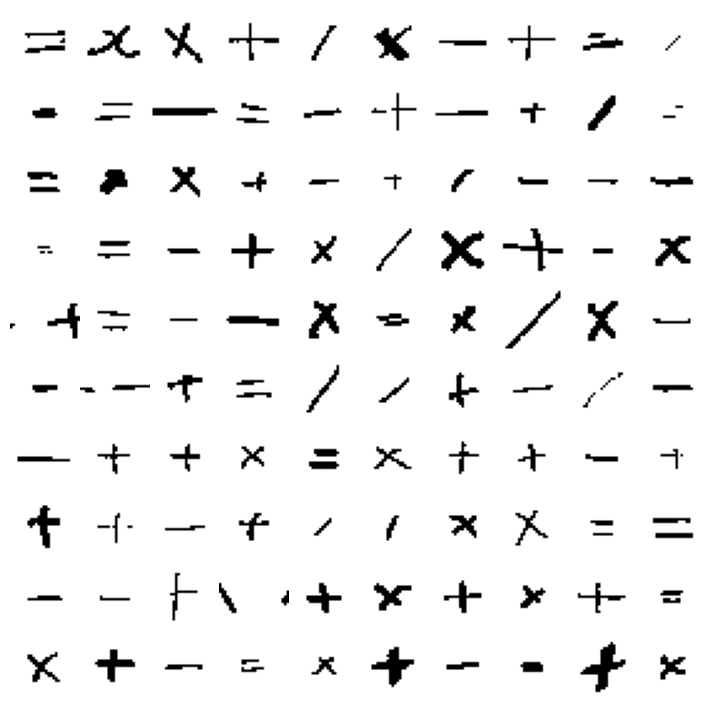

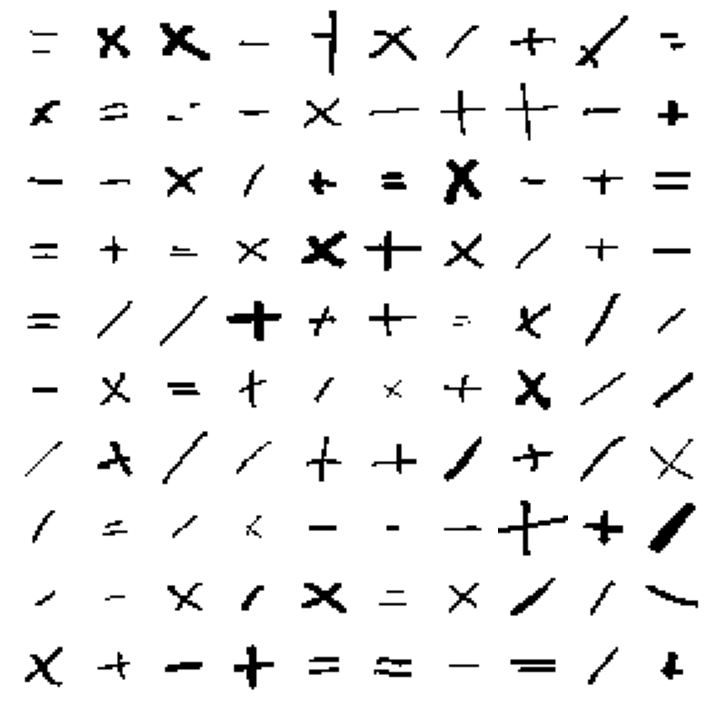

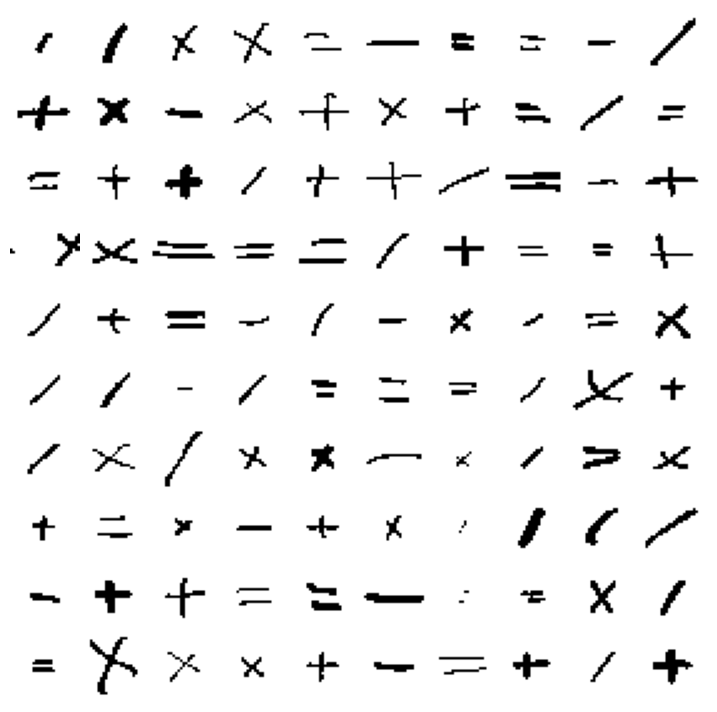

In [29]:
for i in np.arange(0,1000,100):
    plot_multi(curr_data_sym_trVal_img,i,i+100)

so here's the problem; some data's border is included
the easy way is deleting a certain amount of edges, but this may cause some datasets to lose its data(that is close to the edges)

the smart way will be **detecting** the border
how? we can see most borders have something in common; a (kinda) straight line at the edges

so here's the plan;

1. look at each edge (top, down, left, right) and detect whether it contains a certain number of pixels (14~20?)
2. If detected, check the thickness of the boundary
3. delete that certain part

and also

4. rebase

as the boundary is gone

## test with sample

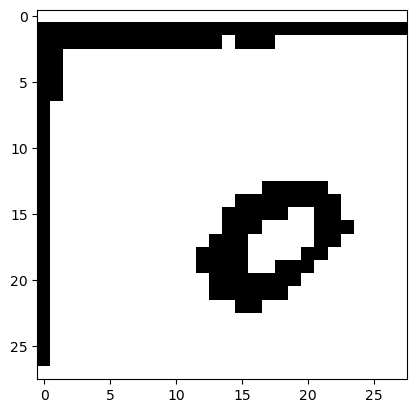

In [31]:
sample = curr_data_num_trVal_img[186]
plot_digit(sample,True)
plt.show()

In [32]:
def detect_del_boundary(img, thickness = 3):
    curr = np.reshape(img,(28,28))
    
    # how much you want to look at
    t = thickness
    # the threshold
    threshold_t = 14 * t
    
    cnt_top = 0
    cnt_down = 0
    cnt_left = 0
    cnt_right = 0
    
    # top
    for i in range(t):
        

SyntaxError: incomplete input (733591024.py, line 15)

In [9]:
curr_data_num_trVal_img[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

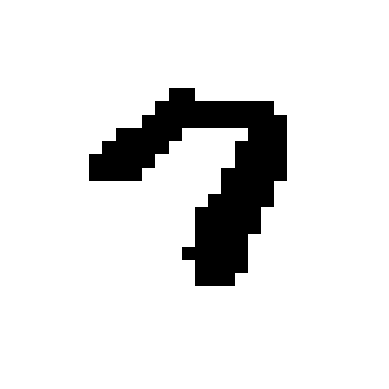

In [10]:
plot_digit(curr_data_num_trVal_img[0])